In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
X = df.drop('Virus Present',axis=1)

In [7]:
y = df['Virus Present']

In [8]:
df.shape

(400, 3)

In [13]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [9]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [10]:
from sklearn.svm import SVC

In [12]:
SVC_model = SVC()  #c,kernel,gamma

In [17]:
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly'],'gamma':['scale','auto']}

In [18]:
grid_model = GridSearchCV(SVC_model,param_grid,cv=5)

In [19]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [20]:
grid_model.best_params_

{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

In [21]:
y_pred = grid_model.predict(X_test)

In [22]:
from svm_margin_plot import plot_svm_boundary

C:\Users\aarav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


AttributeError: 'GridSearchCV' object has no attribute 'support_vectors_'

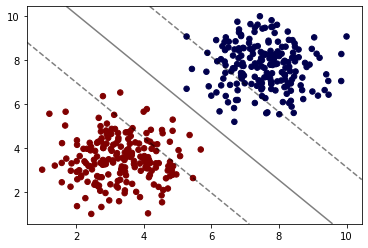

In [24]:
plot_svm_boundary(grid_model,X,y)

In [25]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

